In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# Классифицировать отель, основываясь на загруженном датасете.

Загрузим данные:

In [2]:
url = "https://raw.githubusercontent.com/splashbros30/MLHomeworks/master/hotel_booking.csv"
data_raw = pd.read_csv(url)


In [3]:
data_raw.shape


(119390, 36)

Покажем начало данных:

In [4]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Покажем конец данных:

In [5]:
data_raw.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


Вывод имеющихся признаков:

In [6]:
data_raw.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
data_raw.index

RangeIndex(start=0, stop=119390, step=1)

Корреляция:

In [8]:
data_raw['hotel'].dtype


dtype('O')

In [9]:
data_raw['hotel'] = data_raw['hotel'].astype('category')
data_raw['hotel'].dtype

CategoricalDtype(categories=['City Hotel', 'Resort Hotel'], ordered=False)

In [10]:
data_raw['arrival_date_month'] = data_raw['arrival_date_month'].astype('category')
data_raw['arrival_date_month'].dtype


CategoricalDtype(categories=['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
, ordered=False)

In [11]:
data_raw['meal'] = data_raw['meal'].astype('category')
data_raw['meal'].dtype

CategoricalDtype(categories=['BB', 'FB', 'HB', 'SC', 'Undefined'], ordered=False)

In [12]:
data_raw['country'] = data_raw['country'].astype('category')
data_raw['country'].dtype

CategoricalDtype(categories=['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
                  'ASM', 'ATA',
                  ...
                  'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF',
                  'ZMB', 'ZWE'],
, ordered=False)

In [13]:
data_raw['market_segment'] = data_raw['market_segment'].astype('category')
data_raw['market_segment'].dtype

CategoricalDtype(categories=['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
                  'Offline TA/TO', 'Online TA', 'Undefined'],
, ordered=False)

In [14]:
data_raw['distribution_channel'] = data_raw['distribution_channel'].astype('category')
data_raw['distribution_channel'].dtype

CategoricalDtype(categories=['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'], ordered=False)

In [15]:
data_raw['reserved_room_type'] = data_raw['reserved_room_type'].astype('category')
data_raw['reserved_room_type'].dtype


CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], ordered=False)

In [16]:
data_raw['assigned_room_type'] = data_raw['assigned_room_type'].astype('category')
data_raw['assigned_room_type'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], ordered=False)

In [17]:
data_raw['deposit_type'] = data_raw['deposit_type'].astype('category')
data_raw['deposit_type'].dtype

CategoricalDtype(categories=['No Deposit', 'Non Refund', 'Refundable'], ordered=False)

In [18]:
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['customer_type'].dtype

CategoricalDtype(categories=['Contract', 'Group', 'Transient', 'Transient-Party'], ordered=False)

In [19]:
data_raw['reservation_status'] = data_raw['reservation_status'].astype('category')
data_raw['reservation_status'].dtype

CategoricalDtype(categories=['Canceled', 'Check-Out', 'No-Show'], ordered=False)

In [20]:
data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


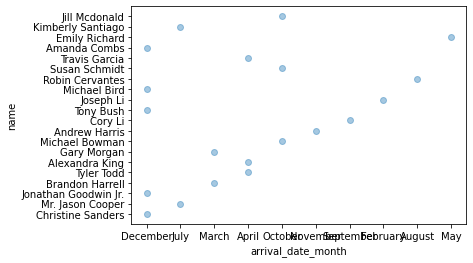

In [21]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=20, replace=False)
plt.scatter(data_raw.iloc[random_subset]['arrival_date_month'], data_raw.iloc[random_subset]['name'], alpha=0.4)
plt.xlabel('arrival_date_month')
plt.ylabel('name')
pass

In [22]:
corr_mat = data_raw.corr()
corr_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [23]:
corr_mat > 0.5


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
lead_time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_year,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_week_number,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_day_of_month,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
stays_in_weekend_nights,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
stays_in_week_nights,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
adults,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
children,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
babies,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [24]:
data_raw['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

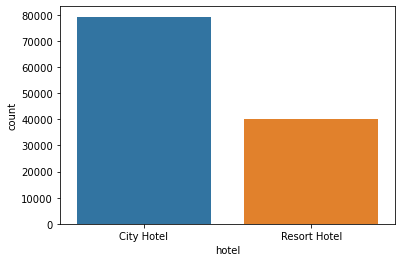

In [25]:
sns.countplot(x='hotel', data=data_raw)
pass

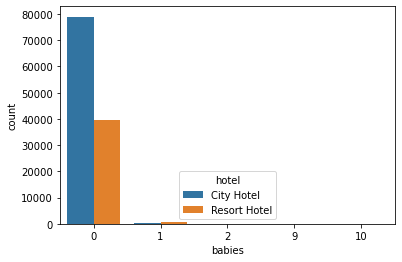

In [26]:
sns.countplot(x='babies', order=data_raw['babies'].value_counts().index, hue='hotel', data=data_raw)
pass

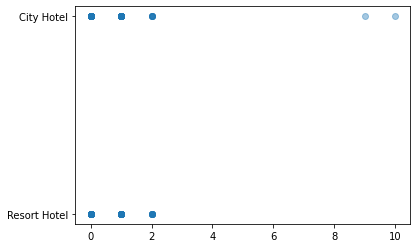

In [27]:
plt.scatter(data_raw['babies'], data_raw['hotel'], alpha=0.4)
pass

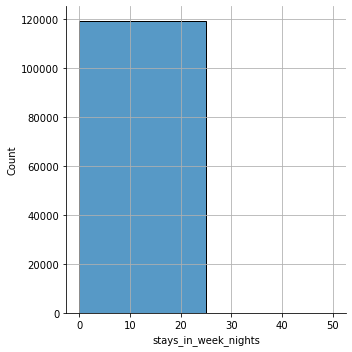

In [28]:
sns.displot(data_raw['stays_in_week_nights'], bins=2)
plt.grid()
pass

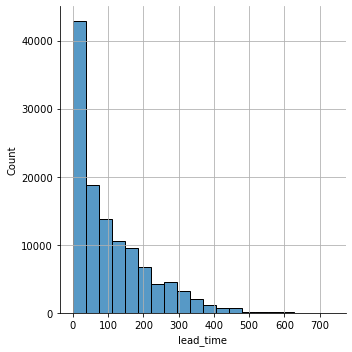

In [29]:
sns.displot(data_raw['lead_time'], bins=20)
plt.grid()
pass

In [30]:
data_raw.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [31]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


In [32]:
data_raw.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [33]:
data_raw['country'].fillna(data_raw['country'].mode().iloc[0], inplace=True)

In [34]:
data_raw.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [35]:
data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,179.584496,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,31.500968,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,179.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,179.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [36]:
data_raw.describe(include=['category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,49078,56477,97870,85994,74053,104641,89613,75166


In [37]:
y = data_raw["hotel"]

In [38]:
data_raw['hotel'] = pd.factorize(data_raw['hotel'])[0]

In [39]:
arrival_date_month_dummies = pd.get_dummies(data_raw['arrival_date_month'])
arrival_date_month_dummies.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
data_raw = pd.concat((data_raw, arrival_date_month_dummies), axis=1)
data_raw = data_raw.drop(['arrival_date_month'], axis=1)

In [41]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,December,February,January,July,June,March,May,November,October,September
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
meal_dummies = pd.get_dummies(data_raw['meal'])
meal_dummies.head()

,BB,FB,HB,SC,Undefined
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [43]:
data_raw = pd.concat((data_raw, meal_dummies), axis=1)
data_raw = data_raw.drop(['meal'], axis=1)

In [44]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,March,May,November,October,September,BB,FB,HB,SC,Undefined
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
country_dummies = pd.get_dummies(data_raw['country'])
country_dummies.head()

,ABW,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,...,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_raw = pd.concat((data_raw, country_dummies), axis=1)
data_raw = data_raw.drop(['country'], axis=1)

In [47]:
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
market_segment_dummies = pd.get_dummies(data_raw['market_segment'])
market_segment_dummies.head()

,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0


In [49]:
data_raw = pd.concat((data_raw, market_segment_dummies), axis=1)
data_raw = data_raw.drop(['market_segment'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,ZMB,ZWE,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
distribution_channel_dummies = pd.get_dummies(data_raw['distribution_channel'])
distribution_channel_dummies.head()

,Corporate,Direct,GDS,TA/TO,Undefined
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [51]:
data_raw = pd.concat((data_raw, distribution_channel_dummies), axis=1)
data_raw = data_raw.drop(['distribution_channel'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,Direct,Groups,Offline TA/TO,Online TA,Undefined,Corporate,Direct,GDS,TA/TO,Undefined
0,0,0,342,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
reserved_room_type_dummies = pd.get_dummies(data_raw['reserved_room_type'])
reserved_room_type_dummies.head()

,A,B,C,D,E,F,G,H,L,P
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [53]:
data_raw = pd.concat((data_raw, reserved_room_type_dummies), axis=1)
data_raw = data_raw.drop(['reserved_room_type'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,A,B,C,D,E,F,G,H,L,P
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
assigned_room_type_dummies = pd.get_dummies(data_raw['assigned_room_type'])
assigned_room_type_dummies.head()

,A,B,C,D,E,F,G,H,I,K,L,P
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
data_raw = pd.concat((data_raw, assigned_room_type_dummies), axis=1)
data_raw = data_raw.drop(['assigned_room_type'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,C,D,E,F,G,H,I,K,L,P
0,0,0,342,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
deposit_type_dummies = pd.get_dummies(data_raw['deposit_type'])
deposit_type_dummies.head()

,No Deposit,Non Refund,Refundable
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [57]:
data_raw = pd.concat((data_raw, deposit_type_dummies), axis=1)
data_raw = data_raw.drop(['deposit_type'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,F,G,H,I,K,L,P,No Deposit,Non Refund,Refundable
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
customer_type_dummies = pd.get_dummies(data_raw['customer_type'])
customer_type_dummies.head()

,Contract,Group,Transient,Transient-Party
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [59]:
data_raw = pd.concat((data_raw, customer_type_dummies), axis=1)
data_raw = data_raw.drop(['customer_type'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,K,L,P,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party
0,0,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
reservation_status_dummies = pd.get_dummies(data_raw['reservation_status'])
reservation_status_dummies.head()

,Canceled,Check-Out,No-Show
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [61]:
data_raw = pd.concat((data_raw, reservation_status_dummies), axis=1)
data_raw = data_raw.drop(['reservation_status'], axis=1)
data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,Canceled,Check-Out,No-Show
0,0,0,342,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,737,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,7,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,13,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,14,2015,27,1,0,2,2,0.0,...,1,0,0,0,0,1,0,0,1,0


Нормированность:

In [62]:
data_raw = data_raw.loc[:,~data_raw.columns.duplicated()]

In [63]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data_stand.describe()

,A,ABW,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,...,hotel,is_canceled,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,...,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-8.760901e-14,-1.818268e-15,-1.744118e-14,3.016742e-15,4.517880e-15,-7.460609e-15,7.769036e-16,-1.904297e-14,1.733438e-15,5.835540e-16,...,-7.859381e-13,-1.735198e-13,-4.172520e-14,-4.810214e-15,-8.708821e-15,5.787542e-14,1.519090e-15,2.683450e-15,5.805366e-14,-8.461662e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.604667e+00,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,-1.407218e+00,-7.670373e-01,-1.815596e-01,-9.733146e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,-1.310234e+00,-9.288865e-01,-7.206911e-01
25%,-1.604667e+00,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,-1.407218e+00,-7.670373e-01,-1.815596e-01,-8.048748e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,-7.862039e-01,-9.288865e-01,-7.206911e-01
50%,6.231769e-01,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,7.106159e-01,-7.670373e-01,-1.815596e-01,-3.276287e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,-2.621733e-01,7.250190e-02,-7.206911e-01
75%,6.231769e-01,-4.092916e-03,-5.514776e-02,-2.894117e-03,-1.002598e-02,-7.657305e-03,-2.067246e-02,-4.237509e-02,-8.186038e-03,-2.894117e-03,...,7.106159e-01,1.303707e+00,-1.815596e-01,5.239281e-01,-9.155438e-02,-1.031791e-01,-2.548718e-01,2.618573e-01,1.073890e+00,5.406636e-01
max,6.231769e-01,2.443225e+02,1.813295e+01,3.455257e+02,9.974008e+01,1.305932e+02,4.837314e+01,2.359857e+01,1.221582e+02,3.455257e+02,...,7.106159e-01,1.303707e+00,5.507786e+00,5.923360e+00,4.799061e+01,3.069024e+01,3.235943e+01,2.489129e+01,1.809749e+01,5.586082e+00


In [64]:
X = data_stand
feature_names = X.columns

X = X.to_numpy(dtype='f')
y = np.array(y != 'Resort Hotel', dtype='int')
y

array([0, 0, 0, ..., 1, 1, 1])

In [65]:
X[np.isnan(X)] = 0.0
print(X.shape)
print(y.shape)
N, d = X.shape


(119390, 251)
(119390,)


In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

83573 35817


In [68]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

In [69]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_test = np.mean(y_test != y_test_pred)
err_train = np.mean(y_train != y_train_pred)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [70]:
print('Train error: {}, Test error: {}'.format(err_train, err_test))
print("Train accuracy: {:.2f}% Test accuracy: {:.2f}%".format(train_acc* 100, test_acc * 100))

Train error: 0.0, Test error: 0.00019543792054052544
Train accuracy: 100.00% Test accuracy: 99.98%


In [71]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

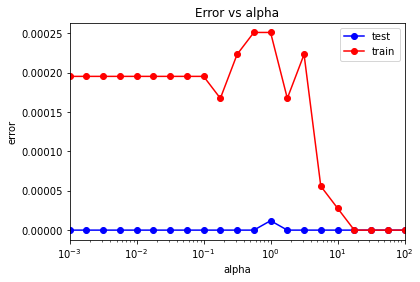

In [72]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

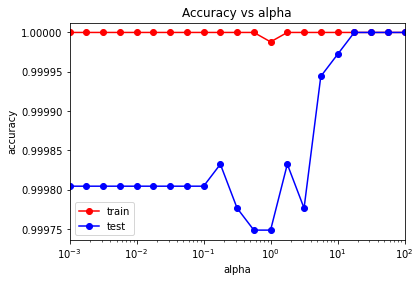

In [73]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

In [74]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.0, 	Min test error: 0.0
Alpha:  17.78279410038923


In [75]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


In [76]:
neurons_arr = np.arange(10, 150, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

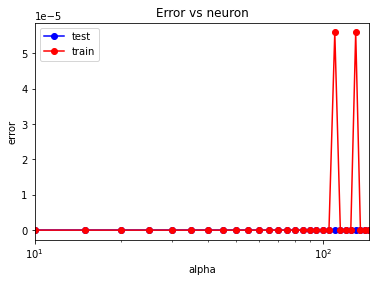

In [77]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
neuron_opt = neurons_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Neuron: ', neuron_opt)

Min train error: 0.0, 	Min test error: 0.0
Neuron:  10


In [79]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.0, Test error: 0.0


Выводы: Мы наблюдаемм переобучение на этом графике, исходя из графика зависимости параметра alpha от точности. На тестовой и на обучающей выборке, при alpha равное оптимальному, точность совпадает. По графику зависимостей количества нейронов от точности видим, что точность зависит от числа нейронов, начиная с оптимального значения нейронов 10 точность на тестовой и обучающей выборках совпадает, при определенных значениях нейронов наблюдается недообучение, поскольку значение точности резко уменьшается. При подборе оптимальных значений гиперпараметров alpha и число нейронов, добились максимальной точности.